In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
plt.rc('axes', titlesize=20)  
plt.rc('axes', labelsize=16) 
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('fr_all.csv')

In [ ]:
df.to_parquet('fr_all.pq', compression='zstd')

In [105]:
usd = df['usd'].values

In [110]:
usd1 = np.log10(usd+1)

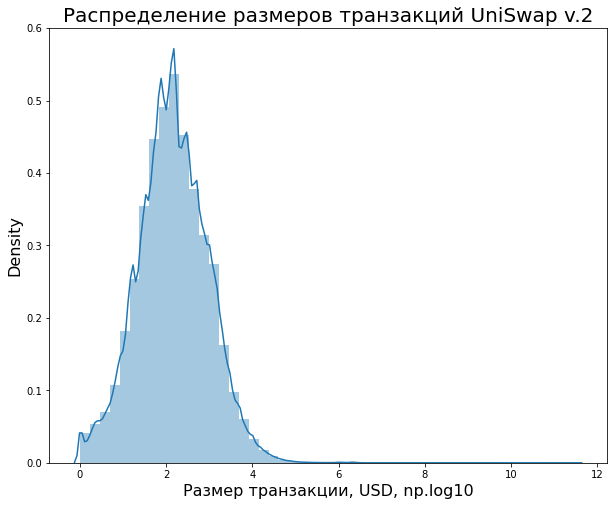

In [111]:
sns.distplot(usd1);
plt.title('Распределение размеров транзакций UniSwap v.2');
plt.xlabel('Размер транзакции, USD, np.log10');
#plt.ylabel('v2 - уд.вес2');
plt.savefig('us1.pdf');

In [114]:
usd2 = usd[usd > 1e6]

In [116]:
len(usd2)

820

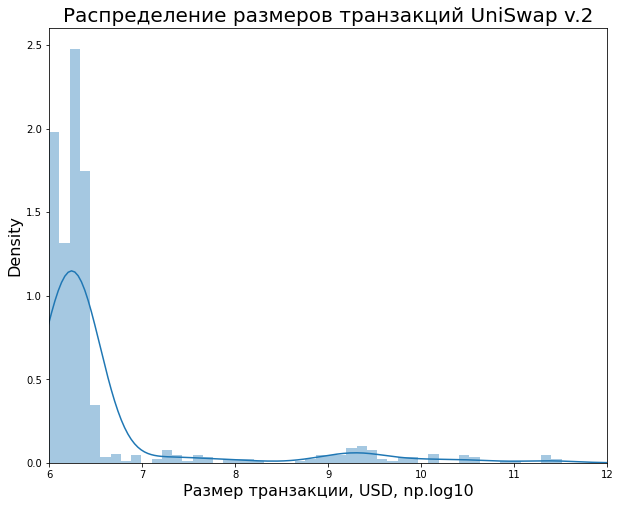

In [122]:
sns.distplot(np.log10(usd2));
plt.title('Распределение размеров транзакций UniSwap v.2');
plt.xlabel('Размер транзакции, USD, np.log10');
#plt.ylabel('v2 - уд.вес2');
plt.xlim(6, 12)
plt.savefig('us2.pdf');

In [123]:
df2 = df[df['usd'] > 1e6]

In [124]:
df2

,block,ts,pool,usd,tx
6315,15800902,1666408667,WETH-EUL,1993225.2,0x3a507f4b44b9b45701e0e3d555c07abbbe54fb6249fb...
13404,15801606,1666417151,WETH-WRLD,2175943.3,0x00b909c2c9acfa813a34cb2a432161f601d9d1a3caf5...
13710,15801606,1666417151,WETH-WRLD,1089617.6,0x9d9e86fd9e882e46305c6aa90c6c920f83855c02de87...
18734,15802196,1666424243,DC-WETH,2177036.9,0xade734b753ac2bb03d98c754cdd90c8fa46c123238b9...
18896,15802196,1666424243,DC-WETH,1091061.5,0xfed76fb6ac306137f905e31c552e444555802c463817...
...,...,...,...,...,...
2514349,16032275,1669201439,DINO-WETH,2494781.7,0x4788b6ddc004943e34434f3183a8ba2783d6f2a99204...
2515538,16032497,1669204103,DINO-WETH,1894981.3,0x1087a05bbaee6220728a0b070f019f202645304e1693...
2517383,16032709,1669206671,CRAB-WETH,1069655.7,0x35dd341916a97aa0f694bbf77fef5aeb489a85a1b0a9...
2517472,16032709,1669206671,CRAB-WETH,2138977.4,0x7d5c950a0a1bb6830a624166eb47b4d2fc6112dfe976...


In [125]:
820*100/2500000

0.0328

In [126]:
df

,block,ts,pool,usd,tx
0,15800548,1666404383,X-WETH,26.0,0x003d189ed9dfcad6091fa614fd7a45c4a2fce56b8963...
1,15800503,1666403843,THE-WETH,78.1,0x005cc29feafdfa492979371d396c91ae66b6e8760a6d...
2,15800522,1666404071,USDT-PRE,826.8,0x008a5693c2a4cee9a4598ddd3e01ba273623bc739f08...
3,15800547,1666404371,THIS Protocol-WETH,8.0,0x00b50083f3f20a5790a18de752b921d343e6b8b0c302...
4,15800521,1666404059,BoredM-WETH,113.7,0x00d8796017264700e7dcefc81e4bb7f3ade5e6c83c17...
...,...,...,...,...,...
2520603,16033094,1669211315,WETH-SBFP,481.2,0xfe1dc267a06503e5a7aecda7bdd718fa496085b9bdee...
2520604,16033072,1669211051,OJA-WETH,87.8,0xff069d005e431862d60191aac532a3c0198b7bc2510b...
2520605,16033065,1669210967,UPI-WETH,116.5,0xff7491c21816e580f17396da2f0eb6de56cb98fee529...
2520606,16033061,1669210919,WETH-VRA,103.8,0xff8ea75bbf210bd30e2bf650d509e6827e8c17e029be...


In [132]:

df2.to_csv(f'whales.csv', index=False)

In [130]:
df2.sort_values(by='usd', ascending=False, inplace=True)

In [131]:
df2

,block,ts,pool,usd,tx
1529634,15920620,1667853923,XPR-USDT,3.241622e+11,0x6a7dc6bb60af43354024d363ca61ab655040e24e5660...
1930566,15964908,1668388295,CIRUS-USDT,3.059464e+11,0x1ec35591f74f357ca44e69381a73be1c1605bd1a6134...
1494579,15917748,1667819315,CIRUS-USDT,2.439495e+11,0xacc4425b4d48179c3b7c7849baaf318ed167eb9aad83...
2381042,16015102,1668994079,USDT-BOTS,2.398050e+11,0x0d75e237007b1f3ff985308dce770f64487cd3c79489...
313805,15822809,1666673303,XPR-USDT,2.295993e+11,0x5ac173c2f7d15653147cde93da1d5f2d8c0926b7570b...
...,...,...,...,...,...
1895149,15960655,1668337103,UNIDX-WETH,1.001995e+06,0xff06a121b8274214ffc96f73d8c66dfb10b6aadaaaa0...
2058112,15978722,1668555035,XEN-WETH,1.001960e+06,0x5922fad65406e8907626c103b0c1efa878a75e6816c3...
1847698,15954116,1668258299,PAXG-WETH,1.000573e+06,0x89478e124aebc6ef7f9a8f83e6854a8581d268662aa2...
2408223,16019005,1669041143,CRAB-WETH,1.000027e+06,0xb07bb15f4b0e2c97265e997a21ba9291c75e4627ca03...


In [133]:
df2

,block,ts,pool,usd,tx
1529634,15920620,1667853923,XPR-USDT,3.241622e+11,0x6a7dc6bb60af43354024d363ca61ab655040e24e5660...
1930566,15964908,1668388295,CIRUS-USDT,3.059464e+11,0x1ec35591f74f357ca44e69381a73be1c1605bd1a6134...
1494579,15917748,1667819315,CIRUS-USDT,2.439495e+11,0xacc4425b4d48179c3b7c7849baaf318ed167eb9aad83...
2381042,16015102,1668994079,USDT-BOTS,2.398050e+11,0x0d75e237007b1f3ff985308dce770f64487cd3c79489...
313805,15822809,1666673303,XPR-USDT,2.295993e+11,0x5ac173c2f7d15653147cde93da1d5f2d8c0926b7570b...
...,...,...,...,...,...
1895149,15960655,1668337103,UNIDX-WETH,1.001995e+06,0xff06a121b8274214ffc96f73d8c66dfb10b6aadaaaa0...
2058112,15978722,1668555035,XEN-WETH,1.001960e+06,0x5922fad65406e8907626c103b0c1efa878a75e6816c3...
1847698,15954116,1668258299,PAXG-WETH,1.000573e+06,0x89478e124aebc6ef7f9a8f83e6854a8581d268662aa2...
2408223,16019005,1669041143,CRAB-WETH,1.000027e+06,0xb07bb15f4b0e2c97265e997a21ba9291c75e4627ca03...


In [139]:
vc = df2['pool'].value_counts()
vc.head(20)

CRAB-WETH         67
GOO-WETH          66
WETH-RGT          44
XEN-WETH          35
BLXM-USDC         31
THE-USDC          29
PAXG-WETH         26
CWEB-USDT         26
UNIDX-WETH        24
DC-WETH           22
FTX Token-WETH    22
FEI-TRIBE         20
DINO-WETH         18
WETH-IMX          17
SHIT-WETH         12
RAD-WETH          11
STMX-WETH          9
CWEB-WETH          9
USDC-DOWN          8
CRO-WETH           8
Name: pool, dtype: int64

In [140]:
df[df['block'] == 15954110]

,block,ts,pool,usd,tx
1847474,15954110,1668258227,PAXG-WETH,37985.2,0x0128e2394987bedbda1891a6ddfa92a4ceab68f3eace...
1847525,15954110,1668258227,WILD-WETH,3264.3,0x25c01b1618d52bb11c48ba7064ec6e99235972aebaa4...
1847538,15954110,1668258227,WETH-TSUKA,31.3,0x2b1edc1cf2c802fcca9de4a90bda75d9970bcfaf7ffe...
1847563,15954110,1668258227,SHIB-WETH,27.8,0x3e6402382c8dc9d647736c99a2b7fc665a3133b469c2...
1847693,15954110,1668258227,Neuralink-WETH,126.7,0x8657f690590f82141c8fe84dfd1e3f1bf0fc8c417532...
1847695,15954110,1668258227,PAXG-WETH,1429626.0,0x87528adfc5e121a6779eb42abd6c90118dd5c9fa953e...
1847734,15954110,1668258227,PAXG-WETH,67807.7,0x9e47d9d7d464022bcf63b3243c1c84b8a105b112ed5b...
1847807,15954110,1668258227,PAXG-WETH,1000011.6,0xccb527695463effca8b06ab799d941366180c14bb137...
1847851,15954110,1668258227,WETH-CAW,119.7,0xe4bd1f22eaea59528f7c2ebe79b165fabf165b97c73b...


In [141]:
df[df['block'] == 15960673]

,block,ts,pool,usd,tx
1894841,15960673,1668337331,WETH-bkSWAN,358.5,0x0e950f7034b840080f81e4dc2f500093d3e5d914faf4...
1894879,15960673,1668337331,BXX-WETH,89.3,0x2caebb1153245ebdcdcc2a8f0eb88f6807bebc93cd59...
1894995,15960673,1668337331,DRC-WETH,39.9,0x83238a4a80df71989b1d29fc0ea8e0bdcb6542ea119a...
1894996,15960673,1668337331,ShibDoge-WETH,49.5,0x84c7ca6c4c9f27d977f8e9c9fca0e29899307aca1350...
1895019,15960673,1668337331,WETH-bkSWAN,51.8,0x950f71b437cf7917036d157724bc364e4aae18f26d60...
1895031,15960673,1668337331,WETH-WRLD,2003206.5,0xa34754ef7e21852ccce0da82d11a68c5cd1345bd4d5b...
1895045,15960673,1668337331,WETH-bkSWAN,256.3,0xae410a501c8f35812d5f0a6e76d31728accf1da61f35...
1895089,15960673,1668337331,CRONU-WETH,49.3,0xd11f101b133f8bff8b35a95b0132d2926d243e3d310a...
1895110,15960673,1668337331,WETH-WRLD,1003311.0,0xe1082f2e207dc241f96dd9de2eb3f9ce3957b14e5c86...
1895113,15960673,1668337331,WETH-PKN,1234.1,0xe42c3c238d96c972bf4ec7298bcdb28bfc8cdc099949...


In [ ]:
df.iloc[1895110]['tx']

In [155]:
df.iloc[1894841]['tx']

'0x0e950f7034b840080f81e4dc2f500093d3e5d914faf4cafc81c812252c2c7853'

In [156]:
df.iloc[1895019]['tx']

'0x950f71b437cf7917036d157724bc364e4aae18f26d60b6266211b058f0056461'

In [150]:
fee = 157051 * 207.071 / 10**9
fee

0.032520707621

In [151]:
fee * 1219.85

39.670385191476846

In [152]:
fee * 1732.04

56.32716642787683

In [2]:
df = pd.read_parquet('ethereum_native_transfers__v1_0_0__15800000_to_15999999.parquet')

In [3]:
df

,block_number,transfer_index,transaction_hash,from_address,to_address,value
0,15800000,0,b'\xd6G\x180\xbb\xe5\xbaM\x93\xccL\x95SY\xea\x...,b'\x00\x00\x00\x00\xa9\x91\xc4)\xee.\xc6\xdf\x...,b'w\xad:\x15\xb7\x81\x01\x88:\xf3j\xd4\xa8u\xe...,b'\xf1\x16\xc0'
1,15800000,1,"b""+\x94\xe2\xae\xfb\x8b\x85\xd8\x96A\xa3\xfc\x...","b'z%\rV0\xb4\xcfS\x979\xdf,]\xac\xb4\xc6Y\xf2H...",b'ptN}S\xc4V\x1d\xaa\xfd%\x94ZbW\xe9\xe8z\x03n',b'\x02\xc6\x8a\xf0\xbb\x14\x00\x00'
2,15800000,2,"b""+\x94\xe2\xae\xfb\x8b\x85\xd8\x96A\xa3\xfc\x...","b""\xc0*\xaa9\xb2#\xfe\x8d\n\x0e\\O'\xea\xd9\x0...","b'z%\rV0\xb4\xcfS\x979\xdf,]\xac\xb4\xc6Y\xf2H...",b'\x02\xc6\x8a\xf0\xbb\x14\x00\x00'
3,15800000,3,b'\xd2\xce\x10\x1a`\xbeMa\xe1\x99\x8e\xdc\x93\...,b'\x00\x00\x00\x00\xa9\x91\xc4)\xee.\xc6\xdf\x...,b'w\xad:\x15\xb7\x81\x01\x88:\xf3j\xd4\xa8u\xe...,b'\xf1\x16\xc0'
4,15800000,4,b'y\x8b\xb7\x16\xf2 \xb2\xd7\x87\x8f\xa1\xf2&\...,b'i\x0b\x9a\x9e\x9a\xa1\xc9\xdb\x99\x1cw!\xa9-...,b'\x98\xc3\xd3\x18<K\x8ae\x06\x14\xad\x17\x9a\...,b'\x125(\x1b\x9eUN'
...,...,...,...,...,...,...
26439362,15999999,266,b'SFg\x83\xc1\x88\xf3\x15\x1b\xbb3$\x97E\x84b4...,b'h\xb3FX3\xfbr\xa7\x0e\xcd\xf4\x85\xe0\xe4\xc...,b'h\xb3FX3\xfbr\xa7\x0e\xcd\xf4\x85\xe0\xe4\xc...,"b'\x03\xa6\xc0KV\xc3""\xc9'"
26439363,15999999,267,b'SFg\x83\xc1\x88\xf3\x15\x1b\xbb3$\x97E\x84b4...,b'!\x9a\xf7#\x85\xc5!\x93D\xf1\x1d\xfa\x81\x0b...,b'h\xb3FX3\xfbr\xa7\x0e\xcd\xf4\x85\xe0\xe4\xc...,b'\x12T\x15\x8e@\x0f\xbd'
26439364,15999999,268,b'\xcb-\n\xa9\t\xa4\xd0\x8c\xd0\x13\xf4\xdd\xd...,b'\xab\xea\x912\xb0Zp\x80:N\x85\tO\xd0\xe1\x80...,b'\xa5g\x89\xa3\xba\xbb<\x9e\x00P\xac_\xbb\x15...,b'\xd5)\xae\x9e\x86\x00\x00'
26439365,15999999,269,b'\xcb-\n\xa9\t\xa4\xd0\x8c\xd0\x13\xf4\xdd\xd...,"b""\x8e\x97+5Ni3'U\x13\xc3U\xee\x14\xd4J\x83*\x...",b'\xab\xea\x912\xb0Zp\x80:N\x85\tO\xd0\xe1\x80...,b'\xd5)\xae\x9e\x86\x00\x00'


In [4]:
df1 = df[:10]

In [5]:
df1

,block_number,transfer_index,transaction_hash,from_address,to_address,value
0,15800000,0,b'\xd6G\x180\xbb\xe5\xbaM\x93\xccL\x95SY\xea\x...,b'\x00\x00\x00\x00\xa9\x91\xc4)\xee.\xc6\xdf\x...,b'w\xad:\x15\xb7\x81\x01\x88:\xf3j\xd4\xa8u\xe...,b'\xf1\x16\xc0'
1,15800000,1,"b""+\x94\xe2\xae\xfb\x8b\x85\xd8\x96A\xa3\xfc\x...","b'z%\rV0\xb4\xcfS\x979\xdf,]\xac\xb4\xc6Y\xf2H...",b'ptN}S\xc4V\x1d\xaa\xfd%\x94ZbW\xe9\xe8z\x03n',b'\x02\xc6\x8a\xf0\xbb\x14\x00\x00'
2,15800000,2,"b""+\x94\xe2\xae\xfb\x8b\x85\xd8\x96A\xa3\xfc\x...","b""\xc0*\xaa9\xb2#\xfe\x8d\n\x0e\\O'\xea\xd9\x0...","b'z%\rV0\xb4\xcfS\x979\xdf,]\xac\xb4\xc6Y\xf2H...",b'\x02\xc6\x8a\xf0\xbb\x14\x00\x00'
3,15800000,3,b'\xd2\xce\x10\x1a`\xbeMa\xe1\x99\x8e\xdc\x93\...,b'\x00\x00\x00\x00\xa9\x91\xc4)\xee.\xc6\xdf\x...,b'w\xad:\x15\xb7\x81\x01\x88:\xf3j\xd4\xa8u\xe...,b'\xf1\x16\xc0'
4,15800000,4,b'y\x8b\xb7\x16\xf2 \xb2\xd7\x87\x8f\xa1\xf2&\...,b'i\x0b\x9a\x9e\x9a\xa1\xc9\xdb\x99\x1cw!\xa9-...,b'\x98\xc3\xd3\x18<K\x8ae\x06\x14\xad\x17\x9a\...,b'\x125(\x1b\x9eUN'
5,15800000,5,b'.\xe1\xf6\x9e\xef=\xdf.)\xef\xb22;\xba\xcd\x...,b'\xe5\x92Bz\n\xec\xe9-\xe3\xed\xee\x1f\x18\xe...,b'\x8e\x0bb\xc9\xf1\xca\xfb\x98iG\xd3\xb4\xfd6...,"b'j\xdb\xe54""\x82\x00\x00'"
6,15800000,6,b'.\xe1\xf6\x9e\xef=\xdf.)\xef\xb22;\xba\xcd\x...,"b""\xc0*\xaa9\xb2#\xfe\x8d\n\x0e\\O'\xea\xd9\x0...",b'\xe5\x92Bz\n\xec\xe9-\xe3\xed\xee\x1f\x18\xe...,"b'j\xdb\xe54""\x82\x00\x00'"
7,15800000,7,b'I\xc4\x18\xc9\xd4\x97^\x89\xc4RdW\xe3\n\xf3\...,b'i\x0b\x9a\x9e\x9a\xa1\xc9\xdb\x99\x1cw!\xa9-...,b'\x98\xc3\xd3\x18<K\x8ae\x06\x14\xad\x17\x9a\...,b'\x06Nx\xa6R\xdfx'
8,15800000,8,b'\xf8~\x876\xcd\x02\xf8;>\xf8\x86P\x7f\xcf}od...,b'\xa6\x9b\xab\xef\x1c\xa6z7\xff\xafzH]\xff\xf...,"b'B\x11%\xca`\x8a5E\x8b,\x99\xda9\xcdU\xb7\x0b...","b',\x01'"
9,15800000,9,b'\xf8~\x876\xcd\x02\xf8;>\xf8\x86P\x7f\xcf}od...,b'b\xe8\xc3*.\xc5\xd9\x04asi5\x9bI\xe1\xc6\x9d...,b'\xa6\x9b\xab\xef\x1c\xa6z7\xff\xafzH]\xff\xf...,"b',\x01'"
